 # 📊 Exploratory Data Analysis (EDA) - A Deep Dive
## **Understanding Data Before Applying Machine Learning**


## 📊 What is Exploratory Data Analysis (EDA)?
EDA is the **process of analyzing and summarizing datasets** before applying machine learning.  
It helps to:
✔ Identify **patterns and trends**  
✔ Detect **missing values and outliers**  
✔ Generate **insights for feature engineering**  
✔ Validate **data quality for predictive modeling**  

## 🔥 Why is EDA Important?
✔ **80% of Data Science is data cleaning**  
✔ Helps **avoid bias in ML models**  
✔ Provides **business insights from raw data**  
✔ **Reduces model overfitting by selecting relevant features**  


## 📊 Why Create a Synthetic Dataset?
Using a large, structured dataset helps in **realistic EDA** without data privacy concerns.  
✔ Control over **missing values & outliers**  
✔ Ensures a **balanced dataset for machine learning**  
✔ Helps practice **data cleaning & feature engineering**  


In [1]:
#Generating the Dataset
import pandas as pd
import numpy as np
import random
!pip install faker

from faker import Faker

# Initialize Faker for generating fake locations
fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
num_samples = 100000

# Generate Customer_ID
customer_id = [f"CUST_{i}" for i in range(1, num_samples + 1)]

# Generate Age (Normally Distributed)
age = np.random.normal(loc=35, scale=10, size=num_samples).astype(int)
age = np.clip(age, 18, 70)

# Generate Gender (Categorical)
gender = np.random.choice(["Male", "Female", "Non-Binary"], size=num_samples, p=[0.48, 0.48, 0.04])

# Generate Income (Log-Normal Distribution)
income = np.random.lognormal(mean=10, sigma=0.5, size=num_samples)
income = np.clip(income, 20000, 200000)

# Generate Spending Score (Normally Distributed)
spending_score = np.random.normal(loc=50, scale=15, size=num_samples)
spending_score = np.clip(spending_score, 0, 100)

# Generate Transactions per Year (Poisson Distributed)
transactions = np.random.poisson(lam=50, size=num_samples)
transactions = np.clip(transactions, 5, 200)

# Generate Signup Date (Time-Series Data)
signup_date = pd.date_range(start="2015-01-01", periods=num_samples, freq="T").to_numpy()
random.shuffle(signup_date)

# Generate Location
location = [fake.city() + ", " + fake.state_abbr() for _ in range(num_samples)]

# Generate Product Category Preference
product_category = np.random.choice(["Electronics", "Clothing", "Grocery", "Health & Beauty", "Sports"], 
                                    size=num_samples, p=[0.25, 0.20, 0.20, 0.15, 0.20])

# Generate Total Purchase Amount
total_purchase_amount = spending_score * transactions * 5

# Generate Credit Score
credit_score = np.random.normal(loc=680, scale=50, size=num_samples)
credit_score = np.clip(credit_score, 300, 850)

# Generate Loan Default
has_defaulted = np.random.choice([0, 1], size=num_samples, p=[0.90, 0.10])

# Introduce Missing Values
income[np.random.randint(0, num_samples, 5000)] = np.nan
spending_score[np.random.randint(0, num_samples, 3000)] = np.nan
credit_score[np.random.randint(0, num_samples, 2000)] = np.nan

# Create DataFrame
df = pd.DataFrame({
    "Customer_ID": customer_id,
    "Age": age,
    "Gender": gender,
    "Income": income,
    "Spending_Score": spending_score,
    "Transactions_Per_Year": transactions,
    "Signup_Date": signup_date,
    "Location": location,
    "Product_Category": product_category,
    "Total_Purchase_Amount": total_purchase_amount,
    "Credit_Score": credit_score,
    "Has_Defaulted": has_defaulted
})

# Save to CSV
df.to_csv("customer_behavior_data.csv", index=False)

# Display first 5 rows
df.head()


/var/folders/dr/dk1y5shj0wdf06c9fs4l17pr0000gn/T/ipykernel_39630/316187014.py:41: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  signup_date = pd.date_range(start="2015-01-01", periods=num_samples, freq="T").to_numpy()


,Customer_ID,Age,Gender,Income,Spending_Score,Transactions_Per_Year,Signup_Date,Location,Product_Category,Total_Purchase_Amount,Credit_Score,Has_Defaulted
0,CUST_1,39,Male,20000.000000,58.006892,44,2015-01-18 20:56:00,"East Damonberg, AZ",Electronics,12761.516223,636.981577,0
1,CUST_2,33,Female,32676.270721,39.070406,53,2015-01-02 18:20:00,"North Ethan, LA",Electronics,10353.657720,NaN,0
2,CUST_3,41,Male,52725.717021,78.694841,45,2015-02-26 05:54:00,"Deannaburgh, IA",Health & Beauty,17706.339219,693.726549,1
3,CUST_4,50,Female,20760.896800,41.117995,54,2015-01-14 16:48:00,"Vegaland, ME",Health & Beauty,11101.858716,727.717414,0
4,CUST_5,32,Male,20000.000000,58.824818,50,2015-02-14 16:54:00,"Gravesberg, MP",Grocery,14706.204500,758.566685,0


## 🔍 Outlier Detection & Handling
✔ Use **Interquartile Range (IQR) Method**  
✔ Use **Z-Score Method**  
✔ Use **Machine Learning (Isolation Forests)**  


In [4]:
# Check Available Columns
print(df.columns)



Index(['Customer_ID', 'Age', 'Gender', 'Income', 'Spending_Score',
       'Transactions_Per_Year', 'Signup_Date', 'Location', 'Product_Category',
       'Total_Purchase_Amount', 'Credit_Score', 'Has_Defaulted'],
      dtype='object')


In [5]:
# Detect Outliers using IQR (Fixed column name)
Q1 = df['Total_Purchase_Amount'].quantile(0.25)
Q3 = df['Total_Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Total_Purchase_Amount'] >= lower_bound) & 
                     (df['Total_Purchase_Amount'] <= upper_bound)]

print(f"Original Data: {len(df)}, Data after Outlier Removal: {len(df_no_outliers)}")


Original Data: 100000, Data after Outlier Removal: 99016


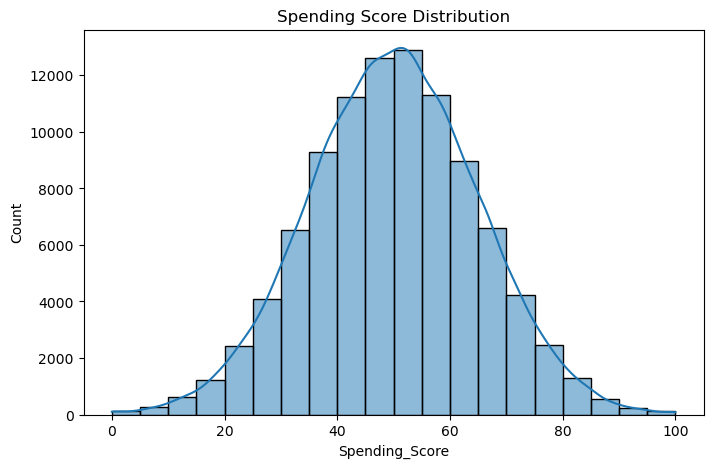

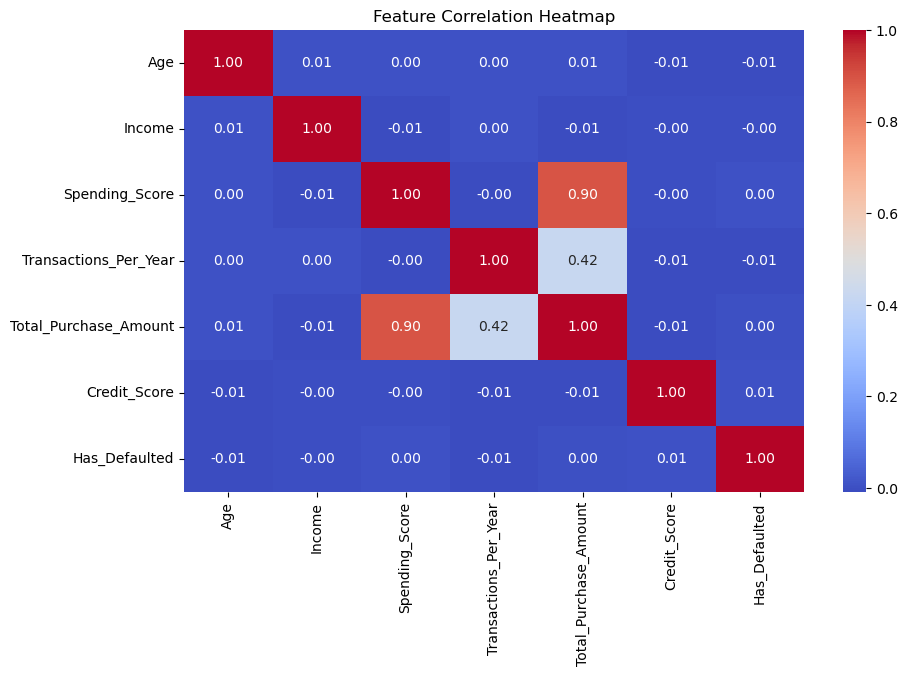

In [10]:
# Histogram of Spending Score
plt.figure(figsize=(8, 5))
sns.histplot(df['Spending_Score'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()


# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation on numeric features only
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [14]:
# Creating a New Feature: Income Per Transaction
df['income_per_transaction'] = df['Income'] / df['Transactions_Per_Year']






## 📌 1️⃣ General Data Science & EDA  

### **Q1: Why is Exploratory Data Analysis (EDA) important in data science?**  
✔ EDA helps **understand data distribution, detect missing values, outliers, and correlations** before applying machine learning models.  
✔ Prevents **garbage-in, garbage-out** issues by ensuring **data quality**.  

### **Q2: What are the key steps in EDA?**  
✔ **Understanding data structure** (e.g., shape, columns, data types)  
✔ **Handling missing values & duplicates**  
✔ **Visualizing distributions (histograms, box plots, etc.)**  
✔ **Detecting outliers & anomalies**  
✔ **Feature engineering & selection**  

### **Q3: What are the types of EDA analysis?**  
✔ **Univariate Analysis** – Examining a single feature (e.g., histograms, box plots)  
✔ **Bivariate Analysis** – Analyzing the relationship between two variables (e.g., scatter plots, correlation)  
✔ **Multivariate Analysis** – Understanding complex relationships (e.g., heatmaps, PCA)  

---

## 📌 2️⃣ Probability & Statistics Questions  

### **Q4: What is the difference between Descriptive and Inferential Statistics?**  
✔ **Descriptive Statistics** – Summarizing and organizing data (mean, median, standard deviation)  
✔ **Inferential Statistics** – Drawing conclusions from data using probability (hypothesis testing, confidence intervals)  

### **Q5: What is the Central Limit Theorem (CLT) and why is it important?**  
✔ CLT states that **the sampling distribution of the sample mean approaches a normal distribution** as sample size increases.  
✔ It allows us to **make statistical inferences about a population** even if the original data is not normally distributed.  

### **Q6: What are Type I and Type II errors?**  
✔ **Type I Error (False Positive)** – Rejecting a true null hypothesis  
✔ **Type II Error (False Negative)** – Failing to reject a false null hypothesis  

### **Q7: What is a p-value, and how do you interpret it?**  
✔ The **p-value** represents the probability of obtaining observed results **assuming the null hypothesis is true**.  
✔ **If p < 0.05**, reject the null hypothesis (**significant result**).  

### **Q8: What is the difference between correlation and causation?**  
✔ **Correlation** – Two variables move together but **do not imply one causes the other**.  
✔ **Causation** – One variable **directly influences** another.  

### **Q9: What are confidence intervals?**  
✔ Confidence intervals give a **range of values** where the true population parameter is likely to lie.  
✔ **Example:** A 95% confidence interval means there is a **95% chance** the true value falls within this range.  

### **Q10: When should you use a t-test vs. a z-test?**  
✔ **t-test** – Used when **sample size < 30** or when the **population variance is unknown**.  
✔ **z-test** – Used when **sample size ≥ 30** and **population variance is known**.  

---

## 📌 3️⃣ Outlier Detection & Handling Questions  

### **Q11: What is an outlier?**  
✔ An **outlier** is a data point that is significantly different from the rest of the dataset.  
✔ Outliers can **skew models** and lead to **biased predictions**.  

### **Q12: How do you detect outliers?**  
✔ **Interquartile Range (IQR) Method** – Detects outliers based on Q1, Q3, and IQR.  
✔ **Z-Score Method** – Identifies points that are **3+ standard deviations** away from the mean.  
✔ **Machine Learning (Isolation Forests, DBSCAN)** – Detects anomalies in complex datasets.  

### **Q13: How do you handle outliers?**  
✔ **Remove** them if they are due to errors or noise.  
✔ **Cap the values** (e.g., Winsorizing at 5th and 95th percentile).  
✔ **Transform** the data (e.g., log transformation for skewed distributions).  

---

## 📌 4️⃣ Feature Engineering & Selection Questions  

### **Q14: What is Feature Engineering? Why is it important?**  
✔ Feature Engineering is the process of **creating new features** or **modifying existing ones** to improve model performance.  
✔ **Example:** Creating `income_per_transaction = income / transactions_per_year` improves predictive power.  

### **Q15: What is Feature Selection?**  
✔ Feature Selection is **choosing the most important features** to reduce dimensionality and improve model efficiency.  

### **Q16: What are common feature selection techniques?**  
✔ **Filter Methods** – Selecting features based on correlation or statistical tests.  
✔ **Wrapper Methods** – Using ML models (e.g., Recursive Feature Elimination) to select features.  
✔ **Embedded Methods** – Feature selection happens **during model training** (e.g., Lasso Regression).  

### **Q17: What is Principal Component Analysis (PCA)?**  
✔ PCA is a **dimensionality reduction technique** that converts correlated variables into uncorrelated components.  
✔ Reduces overfitting and speeds up ML training.  

---

## 📌 5️⃣ Machine Learning & Data Processing Questions  

### **Q18: How do you handle missing values?**  
✔ **Drop missing values** if they are rare.  
✔ **Impute with mean/median** for numerical data.  
✔ **Use mode or "Unknown"** for categorical data.  
✔ **Predict missing values using ML models** (advanced approach).  

### **Q19: What is the difference between Normalization and Standardization?**  
✔ **Normalization** – Scales data between **0 and 1** (Min-Max Scaling).  
✔ **Standardization** – Centers data to **mean = 0, standard deviation = 1** (Z-score normalization).  

### **Q20: What is an imbalanced dataset? How do you handle it?**  
✔ An imbalanced dataset has **unequal class distribution** (e.g., 95% non-fraud, 5% fraud).  
✔ Handling techniques:  
   - **Resampling** (Oversampling minority, undersampling majority)  
   - **SMOTE (Synthetic Minority Over-sampling Technique)**  
   - **Use different evaluation metrics (Precision-Recall instead of Accuracy)**  

---

## 📌 6️⃣ Real-World Applications of EDA  

### **Q21: How is EDA used in business analytics?**  
✔ **Customer segmentation** → Group customers based on spending habits.  
✔ **Fraud detection** → Identify suspicious transactions with outlier detection.  
✔ **Sales forecasting** → Understand trends in purchasing behavior.  

### **Q22: How is EDA applied in healthcare?**  
✔ **Predicting diseases** → Use patient data for early diagnosis.  
✔ **Drug effectiveness analysis** → Compare test and control groups.  

### **Q23: How is EDA useful in marketing?**  
✔ **A/B testing** → Test different marketing strategies.  
✔ **Customer churn analysis** → Predict customers likely to leave.  

---

